#Early Stopping and Multiple Hypothesis Testing in Pricing Strategy
This project investigates the implications of early stopping in experimental design, particularly focusing on an online travel company's pricing strategy. The goal is to evaluate whether shifting from Upfront Fees to Back-End Fees impacts customer purchase behavior. A critical aspect of this study is to understand the challenges associated with frequent measurements within experiments, especially in terms of statistical significance.

I begin with an assumption of a baseline purchase probability of 7% and hypothesize that the transition to Back-End Fees (the treatment) will yield a 1.5 percentage point increase in purchase probability. The project is structured around three key components:

##Sample Size Calculation:
I calculate the minimum sample size necessary to achieve 80% power for detecting the hypothesized treatment effect, ensuring that our study is adequately powered.

##Batch Experimentation:
I simulate data generation in batches of 500 observations, analyzing the average treatment effect and statistical significance through multiple iterations. This component includes tracking the point at which statistical significance is first observed, allowing us to assess the implications of early stopping.

##Simulation of Multiple Experiments:
I conduct extensive simulations of the experiment to explore the variability in estimated average treatment effects and the frequency of statistically significant results. This analysis helps to highlight the risks associated with early stopping, including inflated Type I error rates and biased treatment effect estimates.


In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import zt_ind_solve_power

In [ ]:
np.random.seed(seed=45)

In [ ]:
p_treated= 0.5
p_purchase= 0.07
treatment_effect= 0.015

data_dict= {}
data_dict['visit_ID'] = pd.Series([i for i in range(0,1000)])
df= pd.DataFrame(data_dict)
df['BF'] = np.random.choice([0,1], p=[1- p_treated, p_treated], size=1000)
df['purchase']=0
df.purchase[df['BF']==0]= np.random.choice([0,1], p=[1- p_purchase ,p_purchase],size = len(df[df.BF==0]))
p_purchase_te= p_purchase + treatment_effect
df.purchase[df['BF']==1]= np.random.choice([0,1], p=[1- p_purchase_te, p_purchase_te],size = len(df[df.BF==1]))

UF_purchase= df[df['BF']==0]['purchase'].sum()
UF_ct= (df['BF'] == 0).sum()

BF_purchase= df[df['BF']==1]['purchase'].sum()
BF_ct= (df['BF'] == 1).sum()

UF_purchase_rate= UF_purchase/UF_ct
BF_purchase_rate= BF_purchase/BF_ct

ATE= BF_purchase_rate - UF_purchase_rate
print(f"Average Treatment Effect: {ATE}")

e= ATE/np.sqrt(p_purchase*(1-p_purchase))
nmin= zt_ind_solve_power(effect_size=e, alpha=0.05, power= 0.8)
min_pop= 2*nmin
print(f"Minimum Population Size: {min_pop}")

Average Treatment Effect: 0.0071082170989664045
Minimum Population Size: 40450.71696557728


In [ ]:
#Create a function to generate simulated data set
#n = number of observation
#p_treated = proportion of population treated
#p_purchase= probability there a was purchase in the UF condition
#treatment_effect = the average treatment effect, or increase in porobability of purchase
def gen_data (n, p_treated, p_purchase, treatment_effect ):

    #creade data disctionary
    data_dict= {}

    #initialize data with consumer id
    data_dict["visit_ID"] = pd.Series ([ i for i in range(0,n)])

    #load data dictionary as pandas data frame
    df = pd.DataFrame(data_dict)

    #asssign treatement and control

    df["BF"] = np.random.choice([0,1], p=[1- p_treated, p_treated], size=n)

    df["purchase"]=0
    # assign purchase outcome with probability if assigned to  UF
    df.purchase[df.BF==0]= np.random.choice([0,1], p=[1- p_purchase ,p_purchase],size = len(df[df.BF==0]))
    # assign purchase outcome with probability if assigned to  BF
    p_purchase_t = p_purchase + treatment_effect
    df.purchase[df.BF==1]= np.random.choice([0,1], p=[1- p_purchase_t,p_purchase_t],size = len(df[df.BF==1]))
    return df



In [ ]:
df2 = gen_data (n=500,  p_treated = 0.5, p_purchase = 0.07, treatment_effect = 0.015 )

UF_purchase2= df2[df2["BF"]==0]['purchase'].sum()
UF_ct2= (df2['BF'] == 0).sum()

BF_purchase2= df2[df2["BF"]==1]['purchase'].sum()
BF_ct2= (df2['BF'] == 1).sum()

UF_purchase_rate2= df2[df2["BF"]==0]['purchase'].mean()
BF_purchase_rate2= df2[df2["BF"]==1]['purchase'].mean()

ATE2= BF_purchase_rate2 - UF_purchase_rate2
print(f"Average Treatment Effect: {ATE2}")

z_stat, p_value = proportions_ztest(np.array([BF_purchase2, UF_purchase2]), np.array([BF_ct2, UF_ct2]))
print(f"Z-stat: {z_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The result is statistically significant.")
else:
    print("The result is not statistically significant.")

Average Treatment Effect: 0.036625540985724445
Z-stat: 1.6653312654480052
P-value: 0.09584668413278984
The result is not statistically significant.


Iteration 1: SDO = 0.002000800320128053, P-value = 0.9182658698547176
Iteration 2: SDO = 0.003304118948282135, P-value = 0.8231460287861232
Iteration 3: SDO = 0.00467568855291884, P-value = 0.7100819581858506
Iteration 4: SDO = 0.00411226318484384, P-value = 0.7176677702160122
Iteration 5: SDO = 0.0013283068920243307, P-value = 0.8964587546190279
Iteration 6: SDO = 0.0010447346485134845, P-value = 0.9114992980421733
Iteration 7: SDO = -0.0007133965351271004, P-value = 0.9349457631533807
Iteration 8: SDO = 0.0006076861038693121, P-value = 0.941669043593594
Iteration 9: SDO = 0.005949967155422439, P-value = 0.4539077422681358
Iteration 10: SDO = 0.012852671400429325, P-value = 0.08909503217492586
Iteration 11: SDO = 0.019134926697951915, P-value = 0.00822953389472164
Iteration 12: SDO = 0.018120336424795824, P-value = 0.008946381747235258
Iteration 13: SDO = 0.0210165726097314, P-value = 0.0015701552753991123
Iteration 14: SDO = 0.019074180034331117, P-value = 0.0028124786312638027
Itera

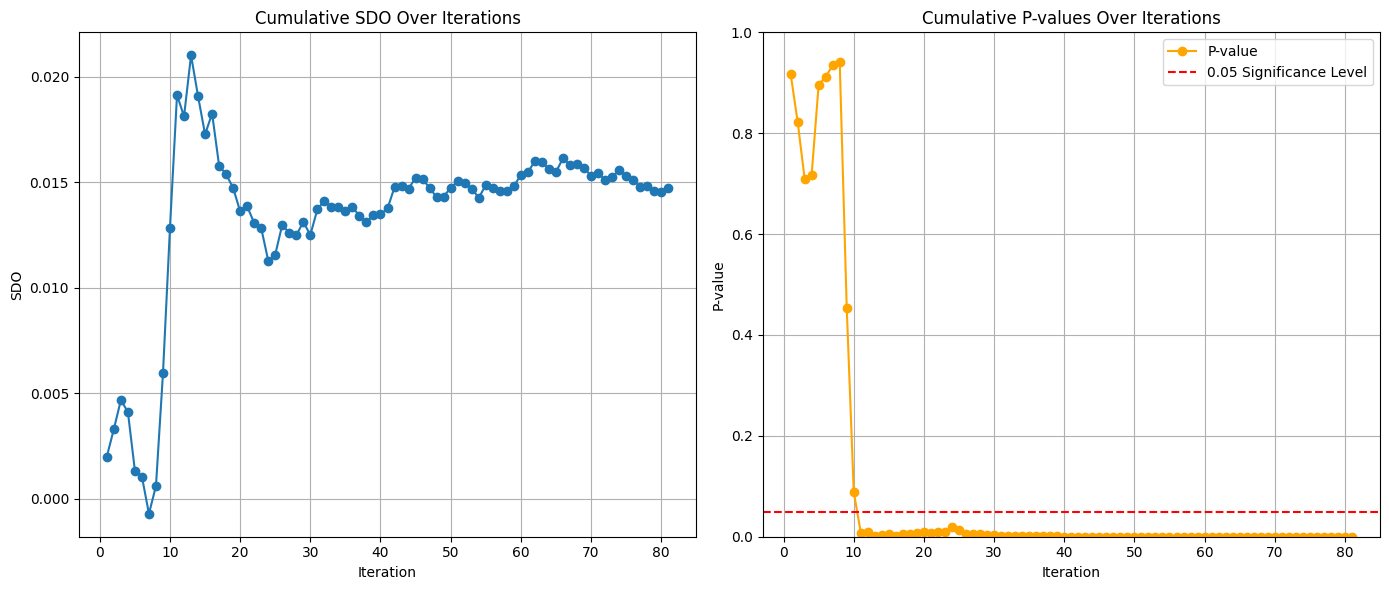

In [ ]:
cumulative_data = pd.DataFrame()
sdo_list = []
pvalue_list = []

size= 500
iterations = int(np.ceil(min_pop / size))

first_significant_iteration = None
first_significant_sdo = None
first_significant_pvalue = None

for i in range(iterations):
    new_data = gen_data(n=500, p_treated=0.5, p_purchase=0.07, treatment_effect=0.015)
    cumulative_data = pd.concat([cumulative_data, new_data], ignore_index=True)

    UF_purchase3= cumulative_data[cumulative_data.BF==0]['purchase'].sum()
    UF_ct3= (cumulative_data['BF'] == 0).sum()

    BF_purchase3= cumulative_data[cumulative_data.BF==1]['purchase'].sum()
    BF_ct3= (cumulative_data['BF'] == 1).sum()

    UF_purchase_rate3= UF_purchase3/UF_ct3
    BF_purchase_rate3= BF_purchase3/BF_ct3

    sdo = BF_purchase_rate3 - UF_purchase_rate3
    sdo_list.append(sdo)

    z_stat, p_value = proportions_ztest(np.array([BF_purchase3, UF_purchase3]), np.array([BF_ct3, UF_ct3]))
    pvalue_list.append(p_value)

    if p_value < 0.05 and first_significant_iteration is None:
        first_significant_iteration = i + 1
        first_significant_sdo = sdo
        first_significant_pvalue = p_value

    print(f"Iteration {i + 1}: SDO = {sdo}, P-value = {p_value}")

print(f"First statistically significant result at iteration: {first_significant_iteration}")
print(f"SDO at first significant result: {first_significant_sdo}")
print(f"P-value at first significant result: {first_significant_pvalue}")

print(f"Final SDO after all iterations: {sdo_list[-1]}")
print(f"Final p-value after all iterations: {pvalue_list[-1]}")

i= range(1, iterations+1)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(i, sdo_list, marker='o', label='Cumulative SDO')
plt.title('Cumulative SDO Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('SDO')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(i, pvalue_list, marker='o', color='orange', label='P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='0.05 Significance Level')
plt.title('Cumulative P-values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('P-value')
plt.ylim(0, 1)
plt.grid()

plt.legend()
plt.tight_layout()
plt.show()

SDO: 0.021093174504753617
Bias: 0.006093174504753617
Percent of experiments yielding a statistically significant result: 8.32%


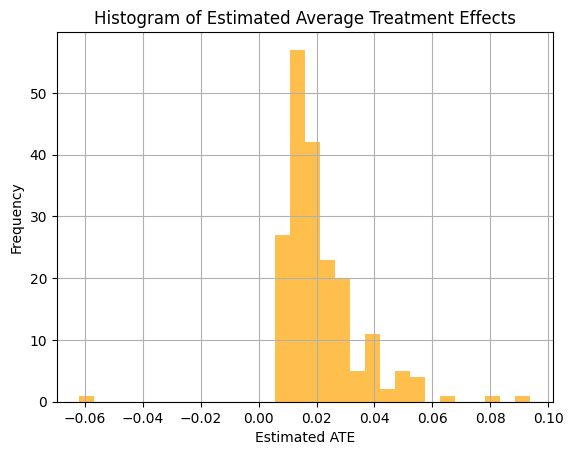

In [ ]:
first_significant_iterations =[]
first_significant_sdos = []
first_significant_pvalues = []
pvalue_list = []
sdo_list = []

for i in range(200):
  cumulative_data= pd.DataFrame()
  first_significant_iteration = None
  first_significant_sdo = None
  first_significant_pvalue = None

  for j in range(iterations):
    new_data = gen_data(n=500, p_treated=0.5, p_purchase=0.07, treatment_effect=0.015)
    cumulative_data = pd.concat([cumulative_data, new_data], ignore_index=True)
    UF_purchase4= cumulative_data[cumulative_data.BF==0]['purchase'].sum()
    UF_ct4= (cumulative_data['BF'] == 0).sum()

    BF_purchase4= cumulative_data[cumulative_data.BF==1]['purchase'].sum()
    BF_ct4= (cumulative_data['BF'] == 1).sum()

    UF_purchase_rate4= UF_purchase4/UF_ct4
    BF_purchase_rate4= BF_purchase4/BF_ct4

    sdo = BF_purchase_rate4 - UF_purchase_rate4
    sdo_list.append(sdo)

    z_stat, p_value = proportions_ztest(np.array([BF_purchase4, UF_purchase4]), np.array([BF_ct4, UF_ct4]))
    pvalue_list.append(p_value)

    if p_value < 0.05 and first_significant_iteration is None:
        first_significant_iteration = i + 1
        first_significant_sdo = sdo
        first_significant_pvalue = p_value

        first_significant_iterations.append(first_significant_iteration)
        first_significant_sdos.append(first_significant_sdo)
        first_significant_pvalues.append(first_significant_pvalue)

        break

sdo_mean= np.mean(first_significant_sdos)
print(f"SDO: {sdo_mean}")

ate_true= 0.015
bias= sdo_mean - ate_true
print(f"Bias: {bias}")

significant_pvalues = len(first_significant_pvalues)
percent_significant = (significant_pvalues / len(pvalue_list)) * 100
print(f"Percent of experiments yielding a statistically significant result: {percent_significant:.2f}%")

plt.hist(first_significant_sdos, bins=30, alpha=0.7, color='orange')
plt.title('Histogram of Estimated Average Treatment Effects')
plt.xlabel('Estimated ATE')
plt.ylabel('Frequency')
plt.grid()
plt.show()



SDO: 0.015008663708319396
Bias: 8.66370831939696e-06


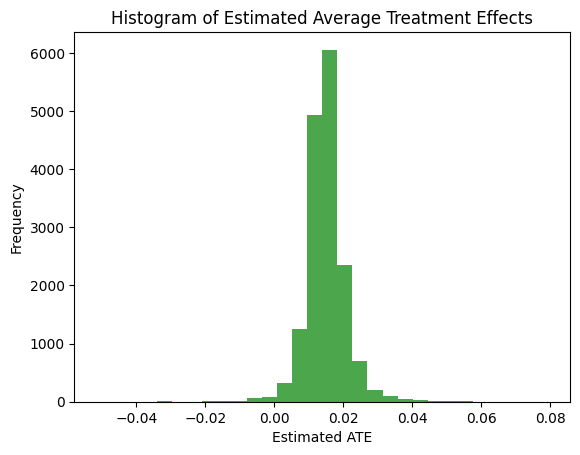

Percent of experiments yielding a statistically significant result: 84.98%


In [ ]:
sdo_list = []
pvalue_list = []

for i in range(200):
  cumulative_data= pd.DataFrame()

  for j in range(iterations):
    new_data = gen_data(n=500, p_treated=0.5, p_purchase=0.07, treatment_effect=0.015)
    cumulative_data = pd.concat([cumulative_data, new_data], ignore_index=True)
    UF_purchase5= cumulative_data[cumulative_data.BF==0]['purchase'].sum()
    UF_ct5= (cumulative_data['BF'] == 0).sum()

    BF_purchase5= cumulative_data[cumulative_data.BF==1]['purchase'].sum()
    BF_ct5= (cumulative_data['BF'] == 1).sum()

    UF_purchase_rate5= UF_purchase5/UF_ct5
    BF_purchase_rate5= BF_purchase5/BF_ct5

    sdo = BF_purchase_rate5 - UF_purchase_rate5
    sdo_list.append(sdo)

    z_stat, p_value = proportions_ztest(np.array([BF_purchase5, UF_purchase5]), np.array([BF_ct5, UF_ct5]))
    pvalue_list.append(p_value)

sdo_mean= np.mean(sdo_list)
print(f"SDO: {sdo_mean}")

ate_true= 0.015
bias= sdo_mean - ate_true
print(f"Bias: {bias}")

plt.hist(sdo_list, bins=30, alpha=0.7, color='green')
plt.title('Histogram of Estimated Average Treatment Effects')
plt.xlabel('Estimated ATE')
plt.ylabel('Frequency')
plt.show()

significant_pvalues_result = np.sum(np.array(pvalue_list) < 0.05)
percent_significant_result = (significant_pvalues_result / len(pvalue_list)) * 100
print(f"Percent of experiments yielding a statistically significant result: {percent_significant_result:.2f}%")